In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

import import_ipynb
from function_for_eda import *

importing Jupyter notebook from function_for_eda.ipynb


# Read Dataset

In [2]:
pos_cash = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_POS_CASH_balance.csv', sep=',')
application_train = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv')

# Basic Information

In [3]:
print_basic_information(pos_cash, 'POS CASH balance', ['SK_ID_PREV', 'SK_ID_CURR'])

The shape of POS CASH balance is: (8543375, 8)
----------------------------------------------------------------------------------------------------
Number of duplicate values in POS CASH balance: 0
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_PREV in POS CASH balance are: 800337
Number of unique SK_ID_CURR in POS CASH balance are: 289444


In [4]:
get_column_names_by_type(pos_cash)

{'int64': ['SK_ID_PREV',
  'MONTHS_BALANCE',
  'SK_DPD',
  'SK_DPD_DEF',
  'SK_ID_CURR'],
 'float64': ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'],
 'object': ['NAME_CONTRACT_STATUS']}

File POS_CASH_balance.csv có 8 features. Trong đó có 2 features là SK_ID_PREV và SK_ID_CURR để chỉ ID cho các khoản vay của khách hàng.

- SK_ID_PREV là ID của khoản vay trước trong Home Credit liên quan đến khoản vay trong mẫu của chúng tôi. (Một khoản vay trong mẫu của chúng tôi có thể có 0,1,2 hoặc nhiều khoản vay trước trong Home Credit).
- SK_ID_CURR là ID cho khoản vay hiện tại của khách hàng với Home Credit.

6 features còn lại mô tả thống kê cho các lịch sử giao dịch và hành vi mua sắm qua thẻ tín dụng của khách hàng tại Home Credit tương ứng với các ID.

###  Features Understanding
- <b>SK_ID_PREV:</b> ID of previous credit related to loan in sample
- <b>SK_ID_CURR:</b> ID of loan in sample
- <b>MONTHS_BALANCE:</b> Month of balance relative to application date
- <b>CNT_INSTALMENT:</b> Term of previous credit (can chane over time)
- <b>CNT_INSTALMENT_FUTURE:</b> Installments left to pay on the previous credit
- <b>NAME_CONTRACT_STATUS:</b> Contract status during the month
- <b>SK_DPD:</b> Day past due during the month of previous credit
- <b>SK_DPD_DEF:</b> Day past due during the month with tolerance (debts with low loan amounts are ignored) of previous credit

# Missing Values

In [5]:
count_missing_values(pos_cash)

Your data frame has 8 columns.
There are 2 columns that have missing values.


,total_nan,percent_nan
CNT_INSTALMENT_FUTURE,21878,0.256081
CNT_INSTALMENT,21863,0.255906


1. Có 2/8 features có chứa giá trị NaN
2. Tỉ lệ NaN không quá lớn (~0.25%), có thể xem xét để loại bỏ các hàng chứa giá trị NaN hoặc fillna bằng mean vì các features chứa giá trị NaN đều là numerical features

##### Merge with Target column to get more insight

In [6]:
pos_cash_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], pos_cash, how='left', on=['SK_ID_CURR'])
pos_cash_merged.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,278621,0,2396755.0,-66.0,12.0,1.0,Active,0.0,0.0
1,278621,0,2636178.0,-23.0,6.0,1.0,Active,0.0,0.0
2,278621,0,1810518.0,-23.0,12.0,10.0,Active,0.0,0.0
3,278621,0,1810518.0,-25.0,12.0,12.0,Active,0.0,0.0
4,278621,0,2396755.0,-67.0,12.0,2.0,Active,0.0,0.0


## Categorical Features

Total Number of unique categories of NAME_CONTRACT_STATUS = 10


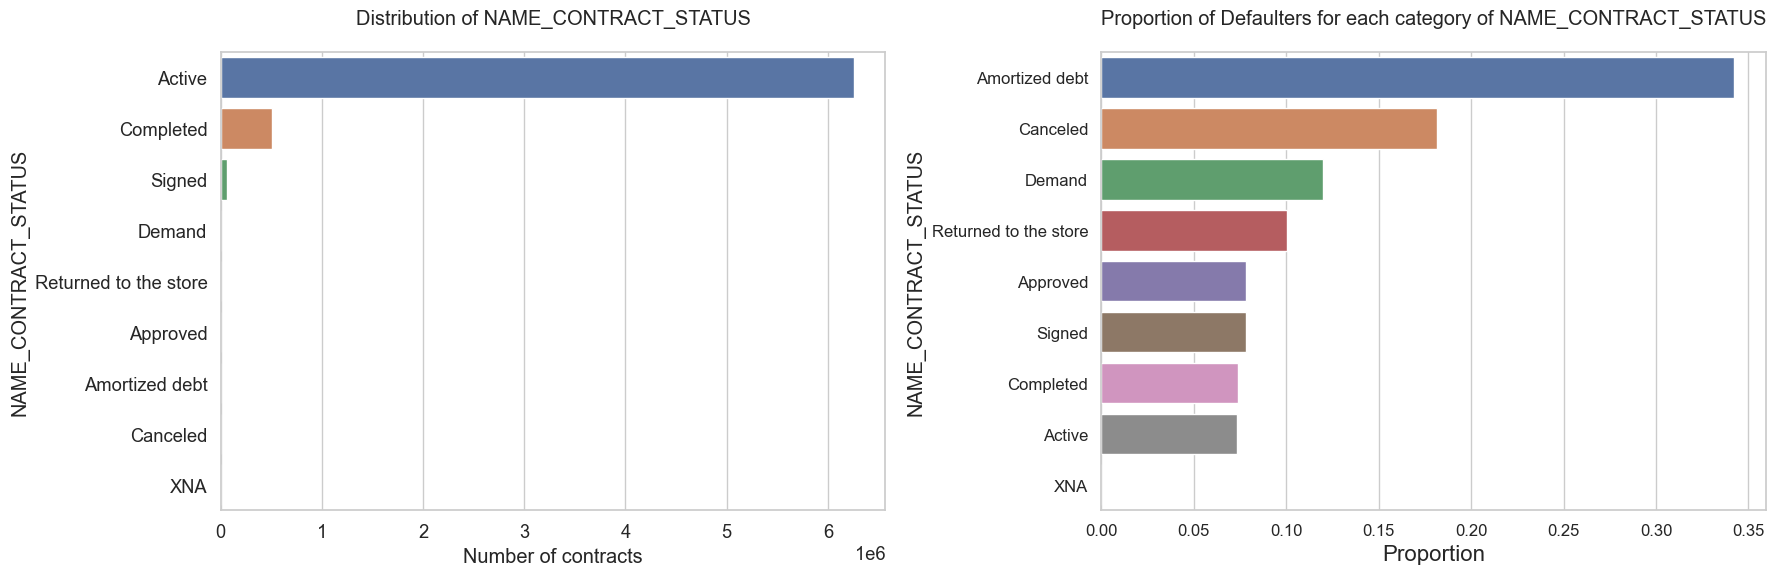

In [7]:
plot_categorical_variables(pos_cash_merged, 'NAME_CONTRACT_STATUS')

##### NAME_CONTRACT_STATUS
- Đa số các hợp đồng đều ở trạng thái Active và Completed. Khi Feature Engineering chúng ta có thể chỉ tập trung vào 2 trạng thái này. 
- Tỉ lệ nợ xấu của các hợp đồng ở trạng thái Active lại nhỏ hơn các hợp đồng khác, đặc biệt là Amortized debt. Tuy nhiên số hợp đồng ở các loại khác khá nhỏ nên điều này cũng có thể không hợp lý

## Numerical Features

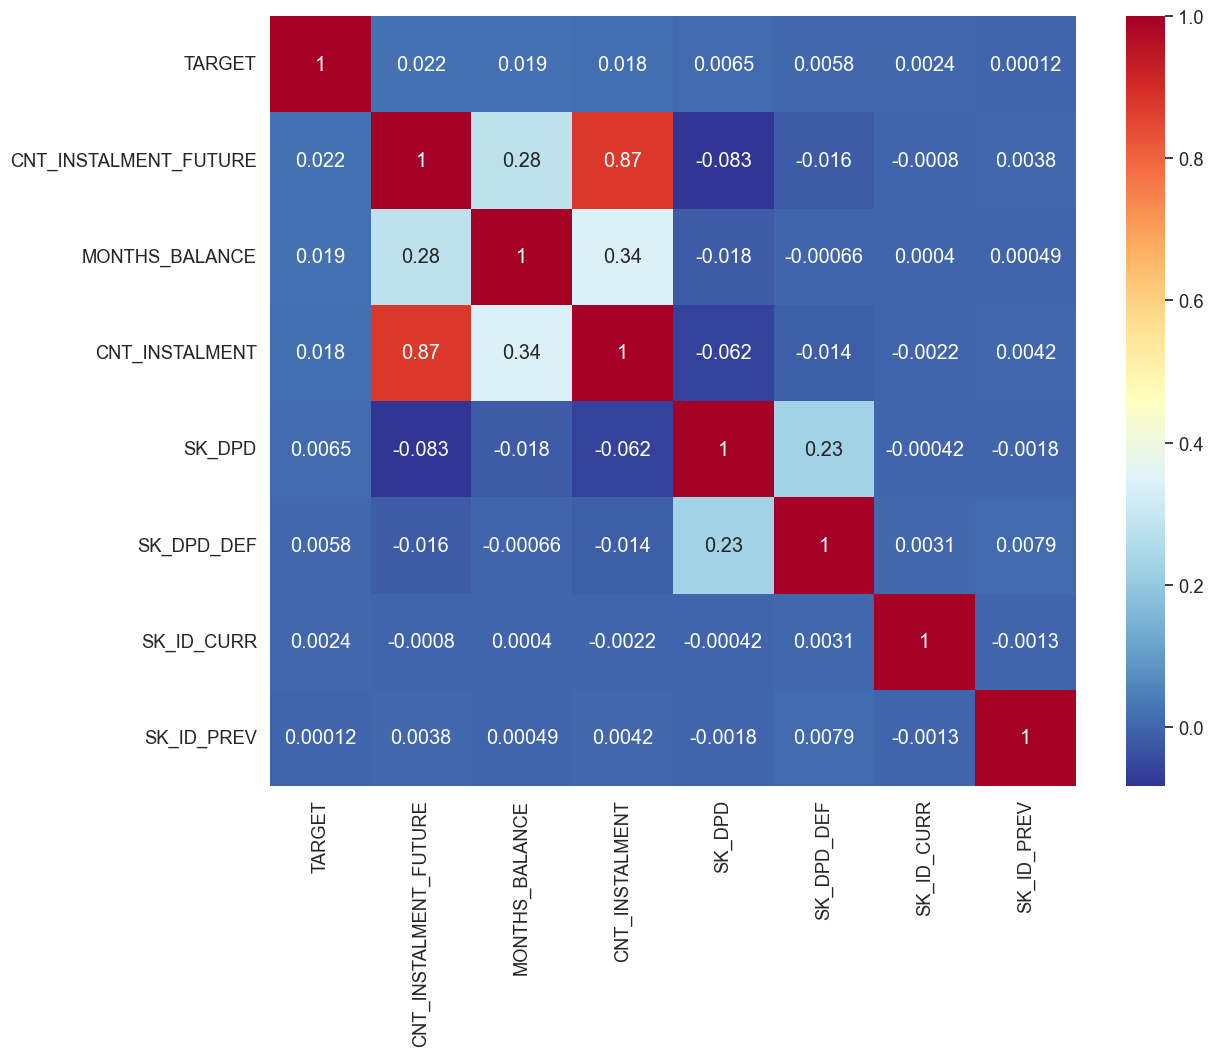

In [8]:
correlation_matrix(pos_cash_merged, 8, numerical = True)

1. Heatmap trên cho biết mức độ tương quan giữa 1 số features (có mức độ tương quan cao nhất với biến Target) với nhau.
2. Từ heatmap trên, ta có thể thấy 'CNT_INSTALMENT_FUTURE' và 'CNT_INSTALMENT' có mức độ tương quan khá cao. Ngoài ra còn có 'SK_DPD' và 'SK_DPD_DEF'.

=> Có thể xem xét tạo ra một số features mới bằng cách thực hiện cách toán tử giữa các features

3. Mức độ tương quan của các đặc điểm với biến TARGET không đáng kể, điều này cho thấy sự vắng mặt của mối quan hệ tuyến tính giữa features và biến TARGET.

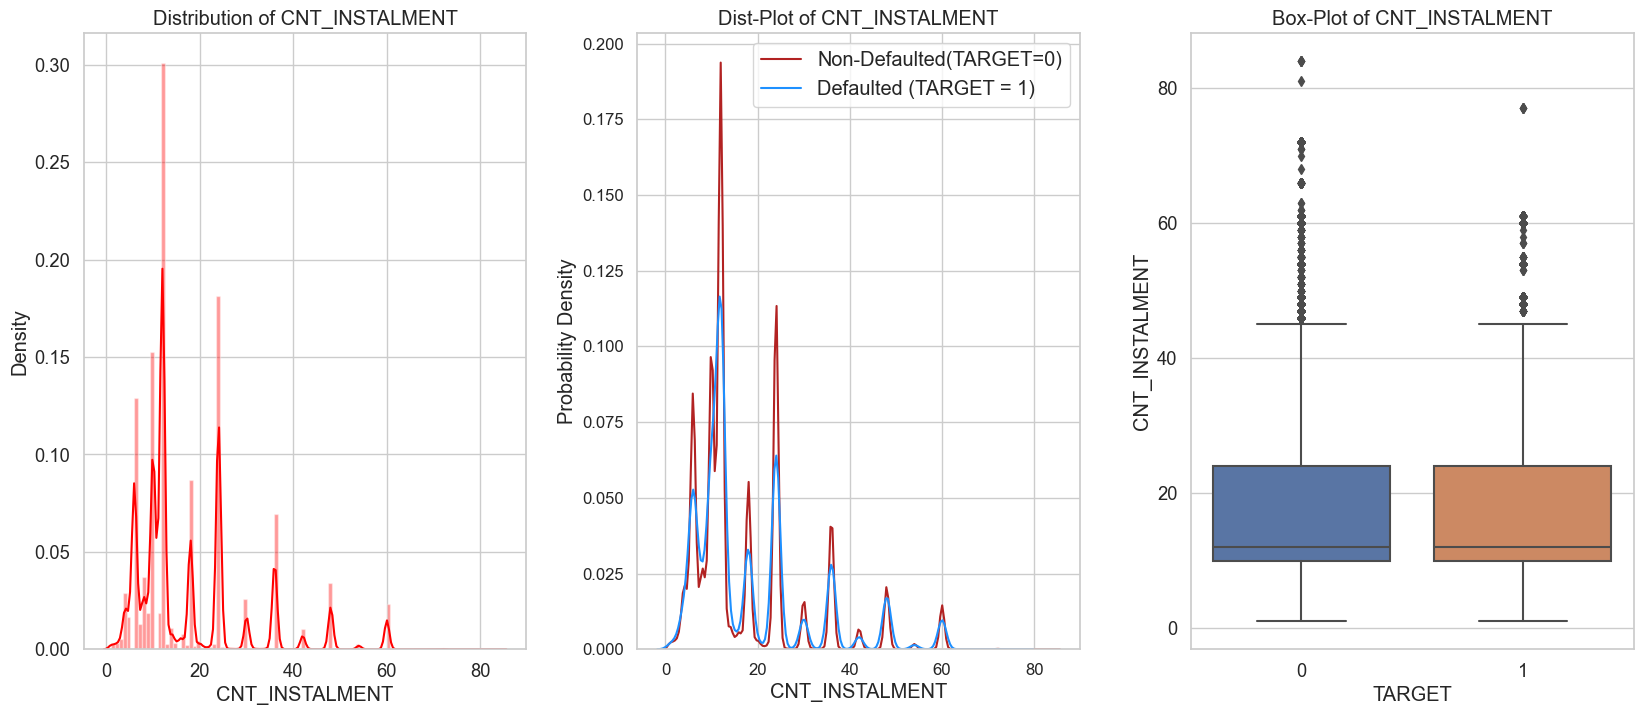

In [9]:
plot_numerical_variables(pos_cash_merged, 'CNT_INSTALMENT')

##### CNT_INSTALMENT
- Dữ liệu tập trung nhiều ở những giá trị thấp
- Dữ liệu cho biến Target=0 có xu hướng trải dài hơn và chứa nhiều outliers hơn so với Target=1

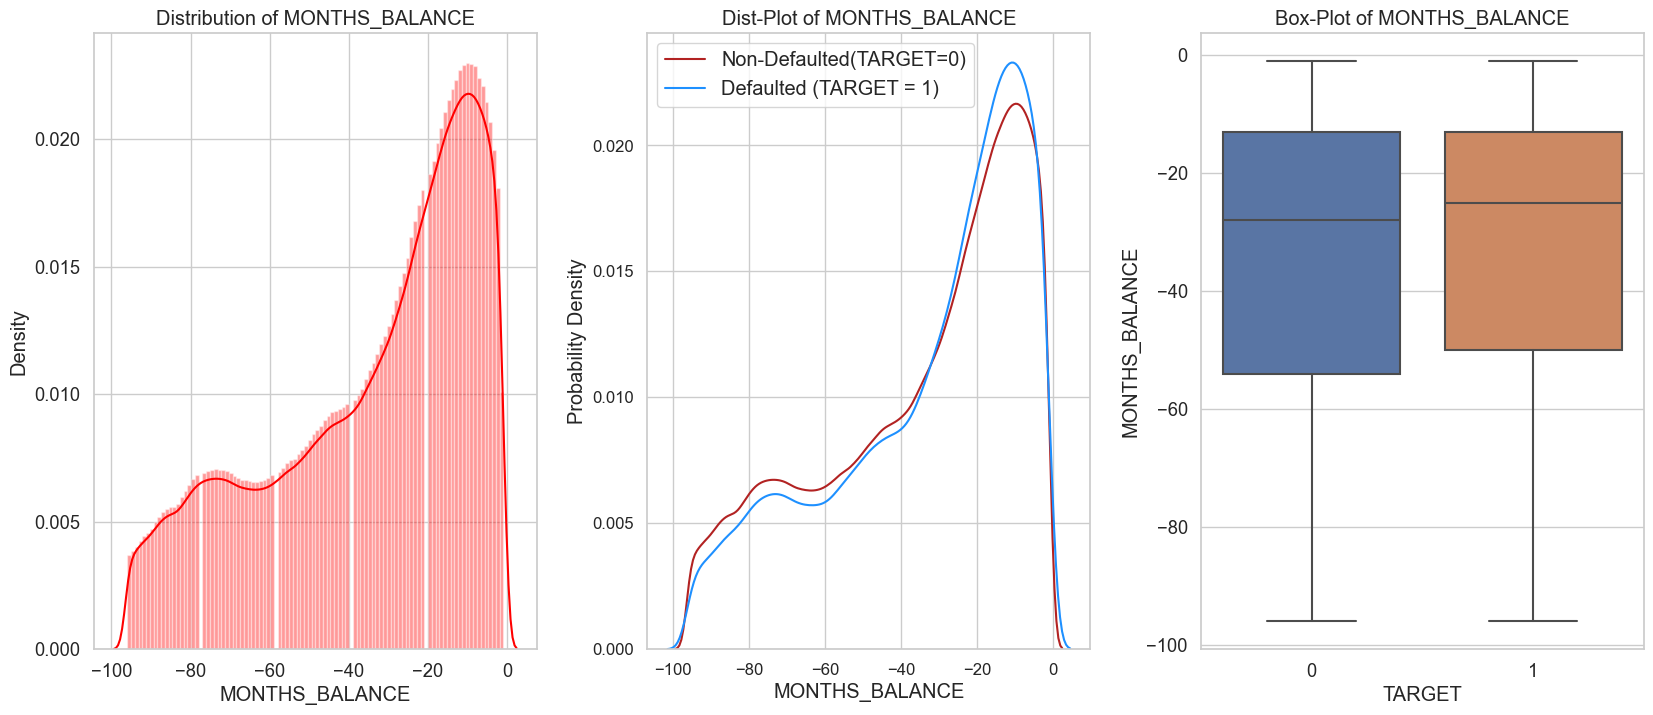

In [10]:
plot_numerical_variables(pos_cash_merged, 'MONTHS_BALANCE')

##### MONTHS_BALANCE
- Giống với cột months_balance ở các bảng khác, đây là một biến có dạng time-series. Khi FE chúng ta có thể sort value theo biến này và thực hiện một số kĩ thuật FE để tạo một số feature
- Dữ liệu tập trung trong khoảng từ khoảng -0 đến -30(tháng) => Chúng ta sẽ tập trung vào những bản ghi trong 2 năm gần nhất để thể hiện rõ hơn về hành vi của khách hàng

### NEW FEATURES

##### SK_DPD_RATIO
Từ heatmap có thể thấy 2 features SK_DPD và SK_DPD_DEF có mức độ tương quan tương đối lớn. Đề xuất tạo thêm feature SK_DPD_RATIO từ 2 features này, thể hiện tỷ lệ giữa số ngày quá hạn và số ngày quá hạn được cho phép. Giá trị này cho biết mức độ nghiêm trọng của việc thanh toán trễ liên quan đến số ngày quá hạn được chấp nhận.

In [11]:
pos_cash_merged['SK_DPD_RATIO'] = pos_cash_merged['SK_DPD'] / (pos_cash_merged['SK_DPD_DEF'] + 0.00001)

##### TOTAL_TERM
Từ heatmap có thể thấy 2 features CNT_INSTALMENT và CNT_INSTALMENT_FUTURE có mức độ tương quan lớn vượt trội so với các feature khác. Đề xuất tạo thêm feature TOTAL_TERM từ 2 features này, thể hiện tổng số kỳ hạn trả góp và số kỳ hạn trả góp còn lại. Giá trị này cho biết tổng thời hạn của khoản vay tín dụng.

In [12]:
pos_cash_merged['TOTAL_TERM'] = pos_cash_merged['CNT_INSTALMENT'] + pos_cash_merged['CNT_INSTALMENT_FUTURE']

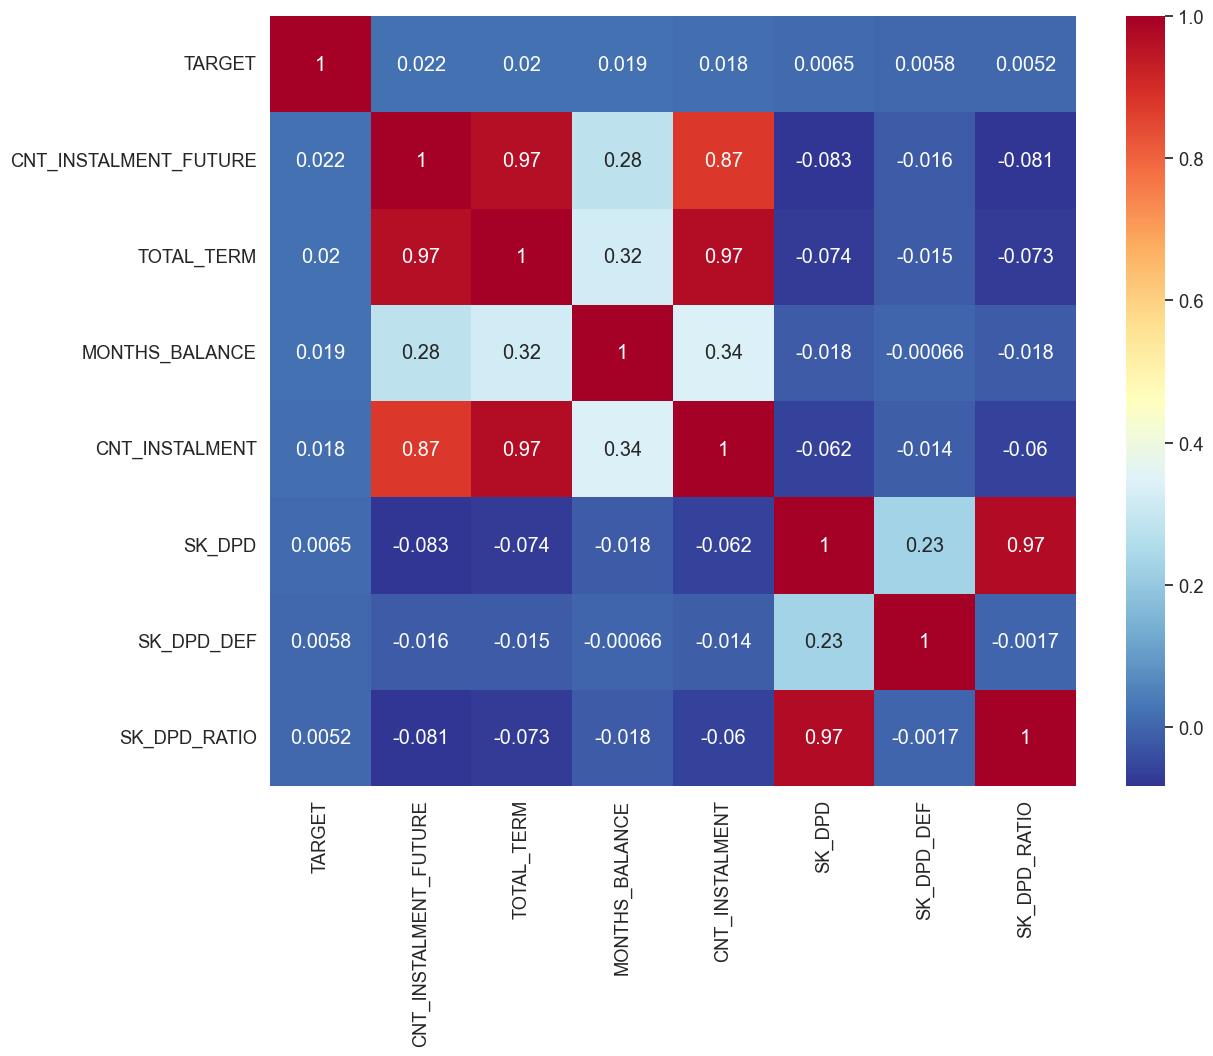

In [13]:
correlation_matrix(pos_cash_merged, 8, numerical = True)

##### Nhận xét
- Có thể thấy, feature mới được tạo thêm có corr khá tốt với biến Target

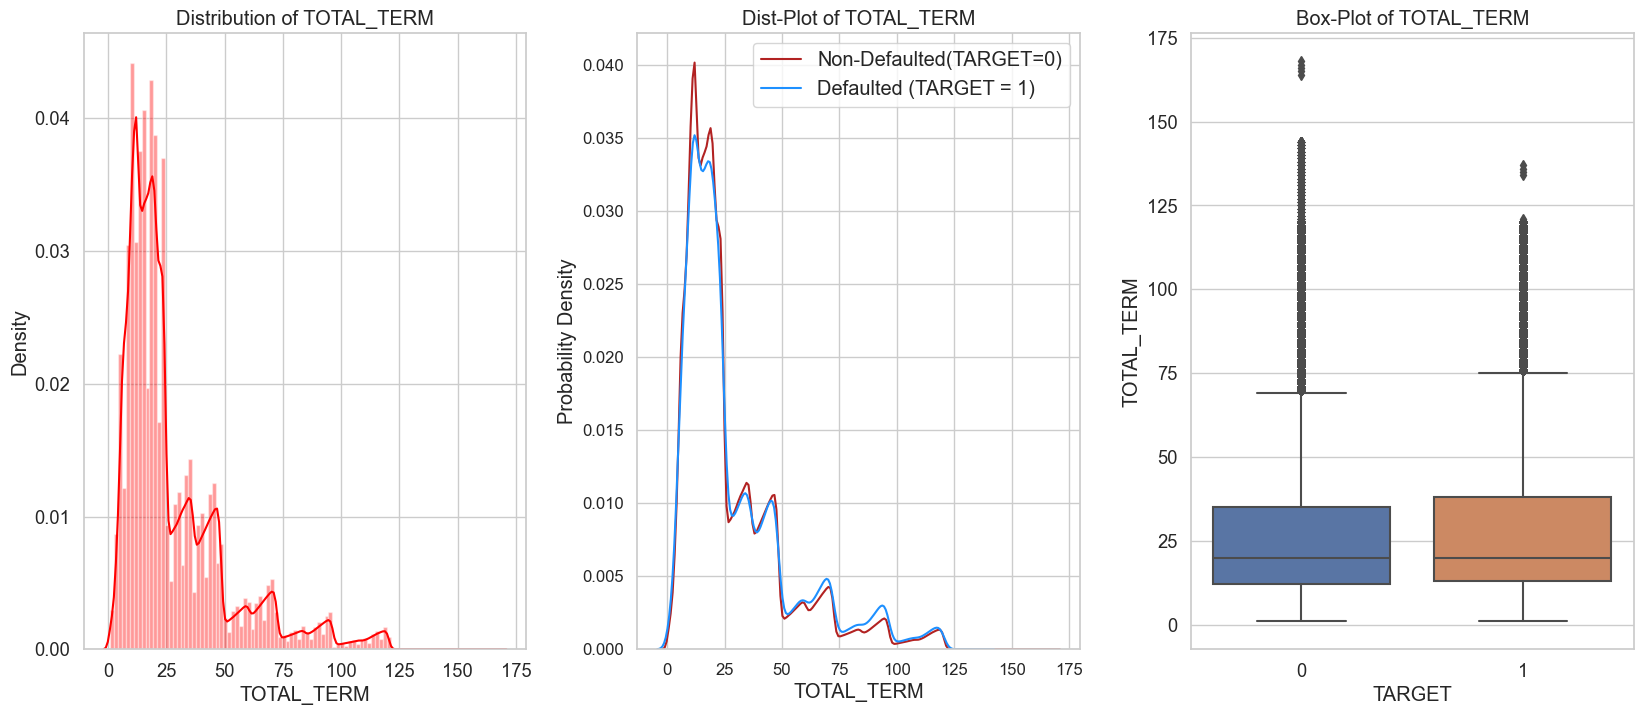

In [14]:
plot_numerical_variables(pos_cash_merged, 'TOTAL_TERM')